In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
from tqdm.auto import tqdm
import statistics

In [2]:
social_df=pd.read_csv('/content/drive/MyDrive/midsemDatasets/IdentityResolution.csv',header=None,names=['name','twitter','facebook','insta'])
print(social_df)

                             name  ...                               insta
0    Alain Stephan Domnguez Lucas  ...   http://instagram.com/alainstephan
1                     Alex Sablan  ...       http://instagram.com/a_sablan
2                     Xavier Gass  ...      http://instagram.com/xavigasso
3                    Nicole Lapin  ...    http://instagram.com/nicolelapin
4                  Mattan Griffel  ...  http://instagram.com/mattangriffel
..                            ...  ...                                 ...
319                   Vasu Chawla  ...    https://instagram.com/vasuchawla
320               Dayn Wilberding  ...           http://instagram.com/dayn
321             Guillermo Navarro  ...      http://instagram.com/bildenlex
322             Antonio J. Cuevas  ...   http://instagram.com/zeroneuronas
323               Ghibril Ariadna  ...        http://instagram.com/ghibril

[324 rows x 4 columns]


In [3]:
def removePunctuation(string):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for x in string:
    if x in punctuations:
      string = string.replace(x, "")
  return string

In [4]:
twitterNames=[]
facebookNames=[]
instaNames=[]
for i in social_df.index:
  twitterNames.append(removePunctuation(social_df.twitter[i].split('/')[-1].lower()))
  facebookNames.append(removePunctuation(social_df.facebook[i].split('/')[-1].lower()))
  instaNames.append(removePunctuation(social_df.insta[i].split('/')[-1].lower()))

In [5]:
social_df.drop(['twitter','facebook','insta'], axis = 1, inplace = True)
social_df['twitter']=twitterNames
social_df['facebook']=facebookNames
social_df['insta']=instaNames
social_df

,name,twitter,facebook,insta
0,Alain Stephan Domnguez Lucas,alainstephan,alainpato,alainstephan
1,Alex Sablan,alexsablancom,alexsablancom,asablan
2,Xavier Gass,xavigasso,xgasso,xavigasso
3,Nicole Lapin,nicolelapin,nicolelapin,nicolelapin
4,Mattan Griffel,mattangriffel,mattangriffel,mattangriffel
...,...,...,...,...
319,Vasu Chawla,vasuchawla,vasuchawla26,vasuchawla
320,Dayn Wilberding,dayn,daynw,dayn
321,Guillermo Navarro,bildenlex,drguillermonavarro,bildenlex
322,Antonio J. Cuevas,zeroneuronas,antoniojcuevas,zeroneuronas


In [6]:
!pip install textdistance
import textdistance

In [7]:
simTwFaJaro=[]
simFaInJaro=[]
simTwInJaro=[]
simTwFaRat=[]
simFaInRat=[]
simTwInRat=[]
for i in social_df.index:
  simTwFaRat.append(textdistance.ratcliff_obershelp(social_df.twitter[i],social_df.facebook[i]))
  simTwFaJaro.append(textdistance.jaro_winkler(social_df.twitter[i],social_df.facebook[i]))
  simFaInRat.append(textdistance.ratcliff_obershelp(social_df.insta[i],social_df.facebook[i]))
  simFaInJaro.append(textdistance.jaro_winkler(social_df.insta[i],social_df.facebook[i]))
  simTwInRat.append(textdistance.ratcliff_obershelp(social_df.insta[i],social_df.twitter[i]))
  simTwInJaro.append(textdistance.jaro_winkler(social_df.insta[i],social_df.twitter[i]))

(array([ 16.,  21.,  26.,  21.,  11.,  23.,  15.,  12.,  25., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

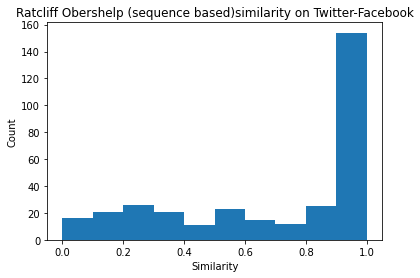

In [8]:
arr=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Ratcliff Obershelp (sequence based)similarity on Twitter-Facebook')
plt.hist(simTwFaRat, bins=arr)

(array([ 12.,   0.,   2.,   7.,  39.,  27.,  19.,  14.,  27., 177.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

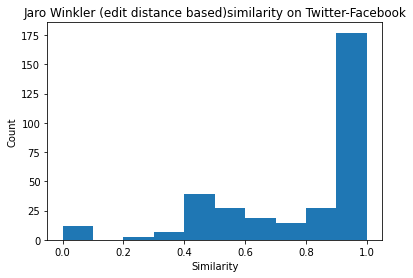

In [9]:
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Jaro Winkler (edit distance based)similarity on Twitter-Facebook')
plt.hist(simTwFaJaro, bins=arr)

(array([ 13.,  19.,  25.,  16.,  11.,  25.,  17.,  14.,  24., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

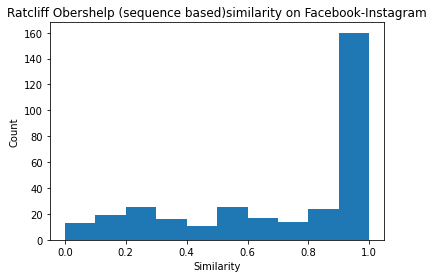

In [10]:
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Ratcliff Obershelp (sequence based)similarity on Facebook-Instagram')
plt.hist(simFaInRat, bins=arr)

(array([ 12.,   0.,   2.,   6.,  34.,  24.,  19.,  15.,  28., 184.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

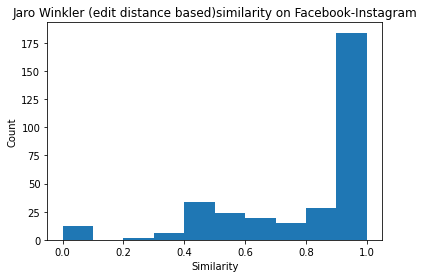

In [11]:
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Jaro Winkler (edit distance based)similarity on Facebook-Instagram')
plt.hist(simFaInJaro, bins=arr)

(array([ 12.,   8.,  16.,   8.,   7.,  10.,  12.,   7.,   9., 235.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

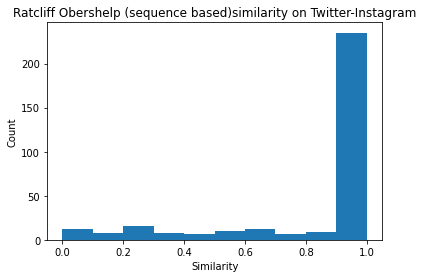

In [12]:
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Ratcliff Obershelp (sequence based)similarity on Twitter-Instagram')
plt.hist(simTwInRat, bins=arr)

(array([  9.,   0.,   0.,   4.,  19.,  17.,  10.,   9.,  15., 241.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

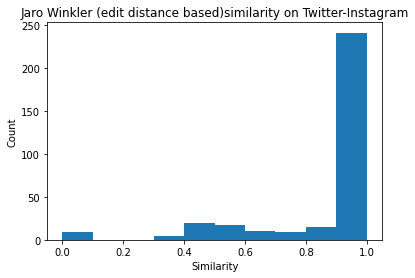

In [13]:
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Jaro Winkler (edit distance based)similarity on Twitter-Instagram')
plt.hist(simTwInJaro, bins=arr)

In [14]:
print('The mean of Ratcliff Obershelp (sequence based)similarity on Twitter-Facebook is '+str(statistics.mean(simTwFaRat)))
print('The standard deviation of Ratcliff Obershelp (sequence based)similarity on Twitter-Facebook is '+str(statistics.stdev(simTwFaRat)))
print('The mean of Jaro Winkler (edit distance based) similarity on Twitter-Facebook is '+str(statistics.mean(simTwFaJaro)))
print('The standard deviation of Jaro Winkler (edit distance based) similarity on Twitter-Facebook is '+str(statistics.stdev(simTwFaJaro)))

The mean of Ratcliff Obershelp (sequence based)similarity on Twitter-Facebook is 0.700988165113022
The standard deviation of Ratcliff Obershelp (sequence based)similarity on Twitter-Facebook is 0.3391560783650944
The mean of Jaro Winkler (edit distance based) similarity on Twitter-Facebook is 0.7931042250027888
The standard deviation of Jaro Winkler (edit distance based) similarity on Twitter-Facebook is 0.2663221999961097


In [15]:
print('The mean of Ratcliff Obershelp (sequence based)similarity on Facebook-Instagram is '+str(statistics.mean(simFaInRat)))
print('The standard deviation of Ratcliff Obershelp (sequence based)similarity on Facebook-Instagram is '+str(statistics.stdev(simFaInRat)))
print('The mean of Jaro Winkler (edit distance based) similarity on Facebook-Instagram is '+str(statistics.mean(simFaInJaro)))
print('The standard deviation of Jaro Winkler (edit distance based) similarity on Facebook-Instagram is '+str(statistics.stdev(simFaInJaro)))

The mean of Ratcliff Obershelp (sequence based)similarity on Facebook-Instagram is 0.7206362511972856
The standard deviation of Ratcliff Obershelp (sequence based)similarity on Facebook-Instagram is 0.3279176755494043
The mean of Jaro Winkler (edit distance based) similarity on Facebook-Instagram is 0.8067161922854186
The standard deviation of Jaro Winkler (edit distance based) similarity on Facebook-Instagram is 0.2611728938309347


In [16]:
print('The mean of Ratcliff Obershelp (sequence based)similarity on Twitter-Instagram is '+str(statistics.mean(simTwInRat)))
print('The standard deviation of Ratcliff Obershelp (sequence based)similarity on Twitter-Instagram is '+str(statistics.stdev(simTwInRat)))
print('The mean of Jaro Winkler (edit distance based) similarity on Twitter-Instagram is '+str(statistics.mean(simTwInJaro)))
print('The standard deviation of Jaro Winkler (edit distance based) similarity on Twitter-Instagram is '+str(statistics.stdev(simTwInJaro)))

The mean of Ratcliff Obershelp (sequence based)similarity on Twitter-Instagram is 0.8363071901277543
The standard deviation of Ratcliff Obershelp (sequence based)similarity on Twitter-Instagram is 0.2945499470775639
The mean of Jaro Winkler (edit distance based) similarity on Twitter-Instagram is 0.8833473676361294
The standard deviation of Jaro Winkler (edit distance based) similarity on Twitter-Instagram is 0.2316370553971256
